In [2]:
# Initial set-up

from problema import problema_monedas
import numpy as np
from matplotlib import pyplot as plt
from utils.utils import time_algorithm
import seaborn as sns
import scipy as sp

sns.set_theme()

In [11]:
# Generate times for the algorithm

def get_random_array(size):
    return list(np.random.randint(1, 100.000, size))

# Run the algorithm n times, with input sizes from min_size to max_size
min_size = 100
max_size = 1_000_000
n = 30
x = np.linspace(min_size, max_size, n).astype(int)

# Obtain results
results = time_algorithm(problema_monedas, x, lambda s: [get_random_array(s)])

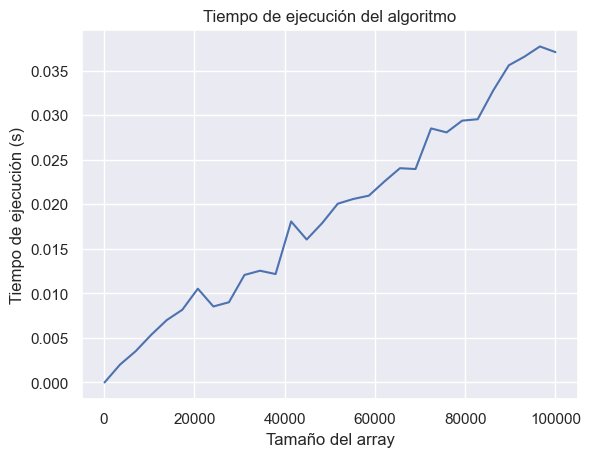

In [12]:
# Plot the results

ax: plt.Axes
fig, ax = plt.subplots()
ax.plot(x, [results[i] for i in x], label="Medición")
ax.set_title('Tiempo de ejecución del algoritmo')
ax.set_xlabel('Tamaño del array')
ax.set_ylabel('Tiempo de ejecución (s)')
None

In [4]:
# scipy nos pide una función que recibe primero x y luego los parámetros a ajustar:
f_lineal = lambda x, c1, c2: c1 * x  + c2 

c, pcov = sp.optimize.curve_fit(f_lineal, x, [results[n] for n in x])

print(f"c_1 = {c[0]}, c_2 = {c[1]}")

r = np.sum((c[0] * x * + c[1] - [results[n] for n in x])**2)
print(f"Error cuadrático total: {r}")

c_1 = 5.267024516521309e-06, c_2 = -0.07471271353995008
Error cuadrático total: 198.00776062344096


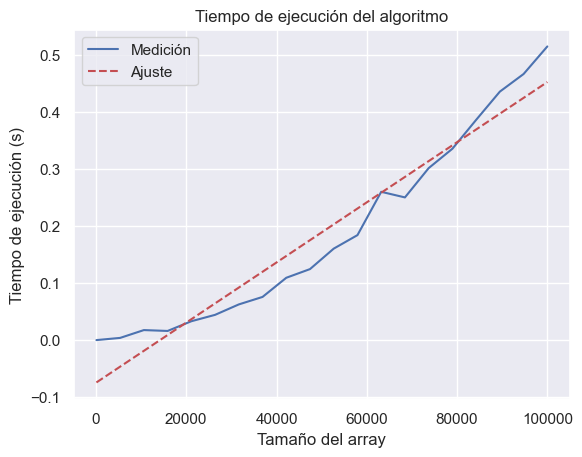

In [5]:
ax.plot(x, [c[0] * n  + c[1] for n in x], 'r--', label="Ajuste")
ax.legend()
fig

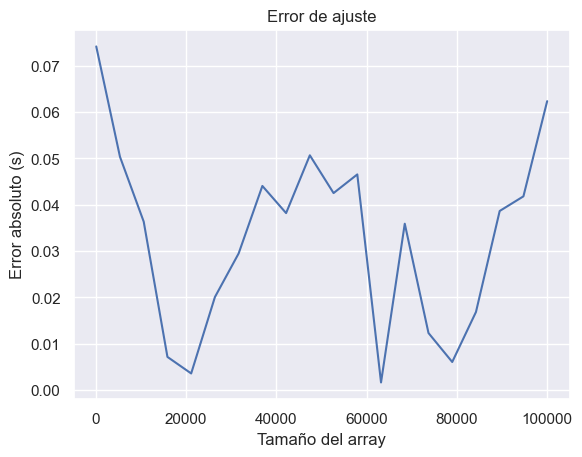

In [6]:
ax: plt.Axes
fig, ax = plt.subplots()
errors = [np.abs(c[0] * n  + c[1] - results[n]) for n in x]
ax.plot(x, errors)
ax.set_title('Error de ajuste')
ax.set_xlabel('Tamaño del array')
ax.set_ylabel('Error absoluto (s)')
None

In [7]:
f_nlogn = lambda x, c1, c2: c1 * x * np.log(x) + c2 
f_n2 = lambda x, c1, c2: c1 * x**2 + c2

c_nlogn, _ = sp.optimize.curve_fit(f_nlogn, x, [results[n] for n in x])
c_n2, _ = sp.optimize.curve_fit(f_n2, x, [results[n] for n in x])

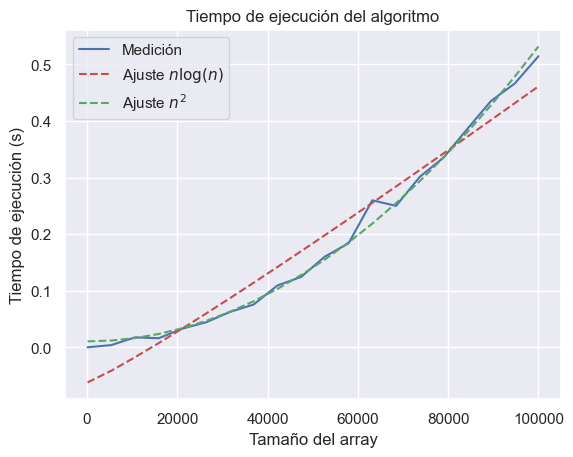

In [8]:
ax: plt.Axes
fig, ax = plt.subplots()
ax.plot(x, [results[n] for n in x], label="Medición")
ax.plot(x, [f_nlogn(n, c_nlogn[0], c_nlogn[1]) for n in x], 'r--', label="Ajuste $n \log(n)$")
ax.plot(x, [f_n2(n, c_n2[0], c_n2[1]) for n in x], 'g--', label="Ajuste $n^2$")
ax.set_title('Tiempo de ejecución del algoritmo')
ax.set_xlabel('Tamaño del array')
ax.set_ylabel('Tiempo de ejecución (s)')
ax.legend()
None

Error cuadrático total para n log(n): 0.022678294461128852
Error cuadrático total para n^2: 0.002657971956580354


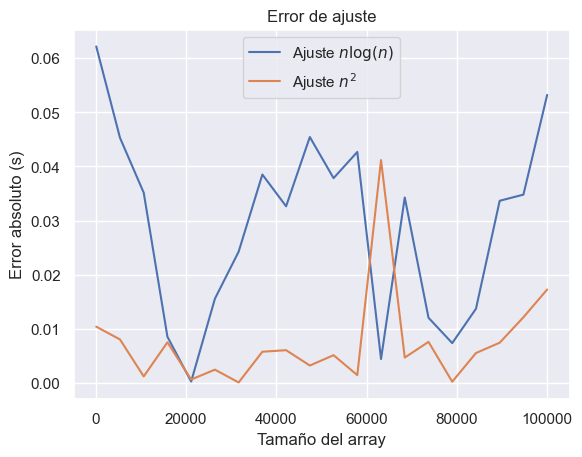

In [9]:
errors_nlogn = [np.abs(c_nlogn[0] * n * np.log(n) + c_nlogn[1] - results[n]) for n in x]
errors_n2 = [np.abs(c_n2[0] * n**2 + c_n2[1] - results[n]) for n in x]

print(f"Error cuadrático total para n log(n): {np.sum(np.power(errors_nlogn, 2))}")
print(f"Error cuadrático total para n^2: {np.sum(np.power(errors_n2, 2))}")

ax: plt.Axes
fig, ax = plt.subplots()
ax.plot(x, errors_nlogn, label="Ajuste $n \log(n)$")
ax.plot(x, errors_n2, label="Ajuste $n^2$")
ax.set_title('Error de ajuste')
ax.set_xlabel('Tamaño del array')
ax.set_ylabel('Error absoluto (s)')
ax.legend()
None